In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [0]:
Ca0 = 1.5 # mol/L
Cb0 = 2 # mol/L
Cc0 = 0 # mol/L
Cd0 = 0 # mol/L
Ce0 = 0 # mol/L
Cf0 = 0 # mol/L
Vdot = 10 # L/min
k1 = 0.25 # L/(mol*min)
k2 = 0.1 # L/(mol*min)
k3 = 5.0 # L2/(mol2*min)

In [0]:
def bilans(y, V, Vdot, k1, k2, k3):
    Fa, Fb, Fc, Fd, Fe, Ff = y
    # Calcul des concentrations
    Ca = Fa / Vdot
    Cb = Fb / Vdot
    Cc = Fc / Vdot
    Cd = Fd / Vdot
    Ce = Fe / Vdot
    Cf = Ff / Vdot
    # Calcul des vitesses de réaction
    r1 = k1 * Ca * Cb
    r2 = k2 * Ca * Cd
    r3 = k3 * Cb**2 * Cc
    # Calcul des vitesses de transformation
    Ra = -r1-3*r2
    Rb = -2*r1-r3
    Rc = r1+r2-2*r3
    Rd = r1-2*r2+r3
    Re = r2
    Rf = r3
    # Calcul des bilans de matière
    dFa = Ra
    dFb = Rb
    dFc = Rc
    dFd = Rd
    dFe = Re
    dFf = Rf
    # On retourne les valeurs des dérivées
    return dFa, dFb, dFc, dFd, dFe, dFf

In [0]:
y0 = [Vdot * Ca0, Vdot * Cb0, Vdot * Cc0, Vdot * Cd0, Vdot * Ce0, Vdot * Ce0]

In [0]:
V = np.linspace(0, 55, 1000)

In [0]:
profils = odeint(bilans, y0, V, (Vdot, k1, k2, k3))

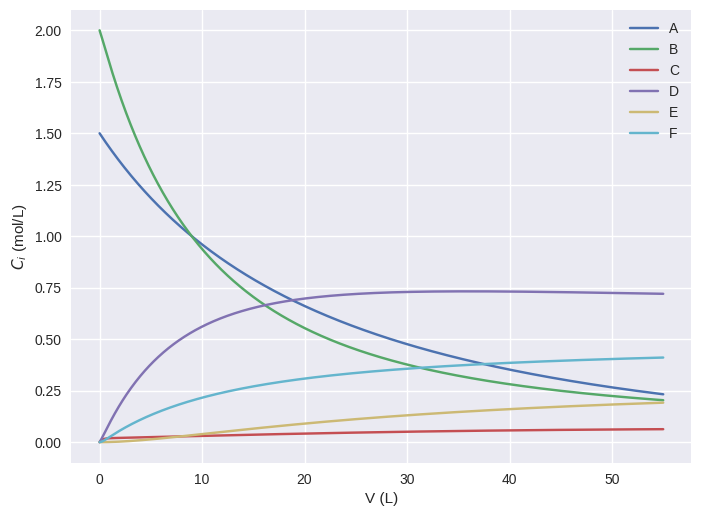

In [49]:
plt.figure(1, dpi=100, figsize=(8, 6))
plt.plot(V, profils/Vdot)
plt.xlabel('V (L)')
plt.ylabel('$C_{i}$ (mol/L)')
plt.legend(['A', 'B', 'C', 'D', 'E', 'F'])
plt.show()

In [0]:
Fa = profils[:,0]
X = 1 - Fa / (Ca0 *Vdot)

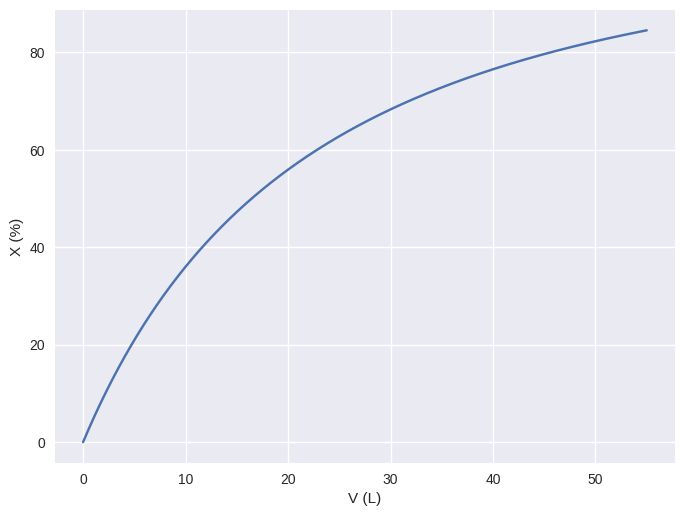

In [51]:
plt.figure(2, dpi=100, figsize=(8,6))
plt.plot(V, X*100)
plt.xlabel('V (L)')
plt.ylabel('X (%)')
plt.show()

In [52]:
X[50]

0.12439846304539615

In [0]:
Fc = profils[:,2]
Cc = Fc/Vdot

In [65]:
Cc[50]

0.021598543293737428